$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{University of Los Andes}$$
$$\textrm{High Energy Physics Group: Phenomenology of Particles}$$

This code was written to be running in Docker. If you do not have a Docker inside hep-server2 please refer to: https://github.com/Phenomenology-group-uniandes/Tutoriales_Generales

$\textbf{Preliminaries}$ 

The libraries used here are:

In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

In [2]:
from Uniandes_Framework.ml_tools.xgb_classifier import XGB_Classifier
from Uniandes_Framework.ml_tools import tools

Welcome to JupyROOT 6.22/06


Until now, we created .csv files. Now we will use it to train XGB models.

**1. Define dictionaries with the paths of .csv files:**

We must create a separated dictionary for signal and for background:

In [3]:
Datasets_signal = {'z': ['Data_z.csv']}
Datasets_bkg = {'stop': ['Data_stop.csv'], 'ttbar': ['Data_ttbar.csv'], 'ww': ['Data_ww.csv']}

Until now, we created .csv files. Now we will use it to train XGB models.

**2. Create Machine Learning model:**

We can create XGB model or Logistic regression model:

In [4]:
parameters={
    "n_estimators":[
        100,
        125
    ],
    "max_depth":[
        3,
        5,
    ],
    "learning_rate":[
        0.1
    ]
}

In [5]:
XGB_model = XGB_Classifier(ncpu = 12,
                           cv =10, 
                           parameters = parameters,
                           signal_dictionary = Datasets_signal,
                           bkg_dictionary = Datasets_bkg,
                           balance = True )

XGB_model have the following attributes

In [6]:
XGB_model.all_signal_dictionary

{'z': ['Data_z.csv'],
 'stop': ['Data_stop.csv'],
 'ttbar': ['Data_ttbar.csv'],
 'ww': ['Data_ww.csv']}

In [7]:
XGB_model.bkg_dictionary

{'stop': ['Data_stop.csv'], 'ttbar': ['Data_ttbar.csv'], 'ww': ['Data_ww.csv']}

In [8]:
XGB_model.signal_dictionary

{'z': ['Data_z.csv']}

In [9]:
XGB_model.signal_data_balanced

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV),pT_{#mu_{1}}(GeV),#eta_{#mu_{1}},#phi_{#mu_{1}},Energy_{#mu_{1}}(GeV),Mass_{#mu_{1}}(GeV)),...,#Delta{#eta}_{#mu_{1}#mu_{2}},#Delta{#phi}_{#mu_{1}#mu_{2}},#Delta{pT}_{#mu_{1}#mu_{2}}(GeV),#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV),#Delta{#vec{p}}_{#mu_{1}#mu_{2}}(GeV),pT_{#mu_{2}}(GeV),#eta_{#mu_{2}},#phi_{#mu_{2}},Energy_{#mu_{2}}(GeV),Mass_{#mu_{2}}(GeV))
0,38.001330,1.594828,-2.095161,180.304588,151.680914,60.427296,1.322975,-0.946126,121.486552,0.105658,...,1.595112,2.483727,3.722107,110.859244,164.117025,56.705189,-0.272138,2.853333,58.818036,0.105658
1,63.545535,-0.565800,-0.344722,117.637245,91.453932,58.751587,-0.325656,0.541386,61.894656,0.105658,...,0.017889,1.931428,6.144192,91.654454,91.660379,52.607395,-0.343545,-1.390043,55.742590,0.105658
2,32.950242,1.648048,1.536500,127.315647,91.246192,52.820000,1.281546,1.871956,102.465873,0.105658,...,1.500453,2.678166,28.554188,75.311656,119.791827,24.265812,-0.218907,-0.806210,24.849774,0.105658
3,60.755247,-1.230919,0.420606,145.493541,91.776966,70.493355,-1.009183,-0.084535,109.542348,0.105658,...,-0.683638,-2.103307,36.366711,92.610376,117.637685,34.126644,-0.325545,2.018773,35.951193,0.105658
4,28.001782,-1.859319,-2.147674,128.886809,90.206178,37.255299,0.023479,-1.467707,37.265717,0.105658,...,2.062846,2.292050,13.810389,55.598043,105.316744,23.444910,-2.039367,2.523428,91.621092,0.105658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,28.298758,2.425228,2.709533,184.692427,90.129895,30.933001,2.291155,1.677717,154.471713,0.105658,...,2.042564,-2.164961,1.622797,53.207682,153.498092,29.310204,0.248591,-2.440507,30.220714,0.105658
1551,46.481092,1.126039,0.890711,120.965673,91.435426,73.052170,0.738680,0.893480,93.905531,0.105658,...,0.547247,3.136748,46.480602,99.623509,113.263844,26.571568,0.191433,-2.243268,27.060143,0.105658
1552,67.468461,-0.529160,1.670847,118.907091,90.491992,71.058243,0.002619,2.098756,71.058565,0.105658,...,1.061773,1.903456,41.436991,85.448181,93.420886,29.621252,-1.059155,0.195301,47.848526,0.105658
1553,91.037505,0.645278,-1.586379,142.605247,89.950788,70.647545,0.936720,-1.210634,103.975915,0.105658,...,1.298073,1.172978,34.410080,65.731512,111.181273,36.237465,-0.361353,-2.383612,38.629332,0.105658


In [10]:
XGB_model.bkg_data_balanced

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV),pT_{#mu_{1}}(GeV),#eta_{#mu_{1}},#phi_{#mu_{1}},Energy_{#mu_{1}}(GeV),Mass_{#mu_{1}}(GeV)),...,#Delta{#eta}_{#mu_{1}#mu_{2}},#Delta{#phi}_{#mu_{1}#mu_{2}},#Delta{pT}_{#mu_{1}#mu_{2}}(GeV),#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV),#Delta{#vec{p}}_{#mu_{1}#mu_{2}}(GeV),pT_{#mu_{2}}(GeV),#eta_{#mu_{2}},#phi_{#mu_{2}},Energy_{#mu_{2}}(GeV),Mass_{#mu_{2}}(GeV))
0,61.064529,-2.888388,-0.416822,558.930556,98.452989,88.192680,-2.284935,-0.355060,437.737012,0.105658,...,-0.121865,3.004124,60.688629,115.498774,331.500698,27.504051,-2.163070,2.924001,121.193545,0.105658
1,67.457559,1.046662,-0.509550,152.331173,107.522154,84.649635,0.663004,0.004243,103.946175,0.105658,...,0.121851,2.233998,42.576977,115.415842,121.028977,42.072659,0.541153,-2.229755,48.384999,0.105658
2,53.971032,1.209014,-3.036043,201.007452,175.240905,115.135048,0.470148,2.866747,128.095899,0.105658,...,0.093949,-2.842645,47.095306,181.268031,183.724365,68.039742,0.376199,-0.573793,72.911553,0.105658
3,30.094647,1.562808,-1.285051,161.334326,142.861691,52.141285,-0.546799,-1.141925,60.132384,0.105658,...,-2.719043,2.951875,29.378510,74.619215,148.647659,22.762775,2.172243,2.189385,101.201941,0.105658
4,75.772652,1.644199,0.229560,217.592824,77.165187,56.173897,1.918447,0.387053,195.406745,0.105658,...,1.843691,0.567082,34.049917,39.350470,189.630748,22.123980,0.074756,-0.180029,22.186079,0.105658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,214.192619,0.036059,-2.116496,232.906989,91.145525,150.395660,0.148505,-2.381603,152.057134,0.105658,...,0.332257,-0.783683,70.891869,109.548789,115.663040,79.503792,-0.183752,-1.597921,80.849855,0.105658
326,21.272901,-2.077883,0.823080,127.200260,93.454930,30.676401,0.236600,-0.342035,31.539219,0.105658,...,2.076533,-2.421487,1.036783,56.449630,113.337493,29.639618,-1.839932,2.079452,95.661041,0.105658
327,29.884160,-0.396376,-1.633173,155.670568,152.290663,35.186256,-1.553373,-1.222875,86.891114,0.105658,...,-3.810776,2.149189,20.950441,44.591469,153.363730,14.235815,2.257404,2.911121,68.779454,0.105658
328,28.781343,-3.563929,0.570077,530.330624,150.858012,83.231163,-2.096518,1.395563,343.772386,0.105658,...,-0.415335,2.821064,16.100479,148.457215,217.886171,67.130684,-1.681183,-1.425501,186.558238,0.105658


In [11]:
X, Y = tools.prepare_to_train(XGB_model.signal_data_balanced,XGB_model.bkg_data_balanced, balance = True)

In [12]:
X

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV),pT_{#mu_{1}}(GeV),#eta_{#mu_{1}},#phi_{#mu_{1}},Energy_{#mu_{1}}(GeV),Mass_{#mu_{1}}(GeV)),...,#Delta{#eta}_{#mu_{1}#mu_{2}},#Delta{#phi}_{#mu_{1}#mu_{2}},#Delta{pT}_{#mu_{1}#mu_{2}}(GeV),#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV),#Delta{#vec{p}}_{#mu_{1}#mu_{2}}(GeV),pT_{#mu_{2}}(GeV),#eta_{#mu_{2}},#phi_{#mu_{2}},Energy_{#mu_{2}}(GeV),Mass_{#mu_{2}}(GeV))
0,51.595065,1.232104,2.430625,131.987635,90.612051,63.093388,1.152159,2.136688,109.813239,0.105658,...,1.580560,-2.313058,42.809235,78.245729,126.059772,20.284153,-0.428401,-1.833439,22.174396,0.105658
1,94.371223,-1.609857,1.387602,269.496661,111.255615,99.642586,-1.174225,0.913413,176.601204,0.105658,...,0.157480,-1.919861,53.785561,123.114157,139.227940,45.857025,-1.331705,2.833274,92.895457,0.105658
2,17.165621,2.418961,2.092789,143.110644,105.051213,42.373837,-0.039639,2.300335,42.407262,0.105658,...,-2.076959,3.004168,16.553810,68.042435,120.142209,25.820026,2.037320,-0.703833,100.703382,0.105658
3,121.951504,1.218887,0.463634,248.715675,107.406599,75.965012,0.434813,0.866331,83.260004,0.105658,...,-1.238533,0.922138,15.991138,62.152453,135.248884,59.973873,1.673346,-0.055807,165.455671,0.105658
4,150.206276,-1.688657,-2.297834,429.669445,89.002290,144.421249,-1.679885,-2.153949,400.865393,0.105658,...,-0.908862,1.376738,122.471416,141.833210,382.558498,21.949833,-0.771024,2.752498,28.804052,0.105658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,19.203225,0.963674,-2.780610,95.782191,91.339809,46.447151,0.725251,-2.130322,59.207496,0.105658,...,1.167985,2.784518,13.186024,78.476220,94.101859,33.261127,-0.442734,1.368346,36.574695,0.105658
656,46.504791,2.417754,0.899556,369.191081,259.121965,123.522636,1.373078,-0.088959,259.447455,0.105658,...,1.085889,-2.764065,18.154266,224.851005,299.258056,105.368370,0.287189,2.675106,109.743626,0.105658
657,9.093771,3.330918,1.599286,136.800783,50.061887,29.538940,1.778717,1.800278,89.962493,0.105658,...,0.322286,3.053809,8.830967,50.200017,66.074539,20.707973,1.456431,-1.253531,46.838291,0.105658
658,48.941178,1.783844,0.268764,226.754132,170.247902,103.723412,0.969189,0.790442,156.373229,0.105658,...,0.605358,2.762884,37.757042,166.808205,190.732754,65.966370,0.363831,-1.972443,70.380904,0.105658


In [13]:
Y

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
655    1.0
656    0.0
657    0.0
658    0.0
659    0.0
Name: Label, Length: 660, dtype: float64

In [14]:
XGB_model.trainPred

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV),pT_{#mu_{1}}(GeV),#eta_{#mu_{1}},#phi_{#mu_{1}},Energy_{#mu_{1}}(GeV),Mass_{#mu_{1}}(GeV)),...,#Delta{#eta}_{#mu_{1}#mu_{2}},#Delta{#phi}_{#mu_{1}#mu_{2}},#Delta{pT}_{#mu_{1}#mu_{2}}(GeV),#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV),#Delta{#vec{p}}_{#mu_{1}#mu_{2}}(GeV),pT_{#mu_{2}}(GeV),#eta_{#mu_{2}},#phi_{#mu_{2}},Energy_{#mu_{2}}(GeV),Mass_{#mu_{2}}(GeV))
154,44.228205,0.380959,-0.548945,110.371411,99.638436,48.405956,0.733541,-1.517712,62.023770,0.105658,...,1.212106,-2.140679,5.111526,80.491952,100.572410,43.294430,-0.478565,0.622967,48.347641,0.105658
38,45.682124,-2.738873,0.053998,368.102923,98.002579,56.441689,-1.633024,0.997835,149.984547,0.105658,...,0.574433,2.246285,9.037781,93.694893,119.359456,47.403908,-2.207457,-1.248450,218.118377,0.105658
447,37.236164,-0.968600,2.424407,96.980083,79.098246,52.029591,-0.898714,2.711180,74.494331,0.105658,...,-1.453584,2.568308,32.610903,69.150528,94.664567,19.418688,0.554871,0.142873,22.485752,0.105658
588,22.629380,-0.269997,-0.574968,50.429497,44.640775,23.204809,0.279614,0.476710,24.118086,0.105658,...,0.808951,2.118265,0.193466,40.297411,44.694125,23.011343,-0.529338,-1.641555,26.311411,0.105658
537,34.048453,-0.690018,-2.141118,99.287423,89.740562,56.276485,-0.092307,-2.851577,56.516510,0.105658,...,0.420735,-2.511746,18.576984,89.539339,90.786922,37.699501,-0.513043,-0.339831,42.770913,0.105658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,47.801386,1.509493,-0.404820,151.837509,100.948513,72.039108,1.161472,-0.271035,126.344283,0.105658,...,1.198348,2.888622,46.563425,96.913955,142.693705,25.475683,-0.036876,3.123528,25.493226,0.105658
327,12.571026,-2.995276,-2.941065,156.371798,92.651876,30.682158,-2.115768,-1.850946,129.118215,0.105658,...,-2.118749,2.720238,3.428900,56.658971,137.697961,27.253258,0.002981,1.712001,27.253584,0.105658
209,54.703667,0.829845,2.762821,105.337735,74.324371,42.370762,1.154012,-2.945684,73.857792,0.105658,...,1.472746,1.452116,12.425032,48.903632,85.556704,29.945730,-0.318734,1.885385,31.479943,0.105658
247,33.331072,0.457213,3.081975,98.337723,91.161762,55.650356,0.106216,-2.373375,55.964669,0.105658,...,-0.130669,2.503524,14.439125,92.085260,92.169161,41.211231,0.236885,1.406286,42.373054,0.105658


In [15]:
XGB_model.trainLab

154    0.0
38     0.0
447    0.0
588    0.0
537    1.0
      ... 
6      0.0
327    0.0
209    0.0
247    1.0
622    0.0
Name: Label, Length: 528, dtype: float64

In [16]:
XGB_model.testPred

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV),pT_{#mu_{1}}(GeV),#eta_{#mu_{1}},#phi_{#mu_{1}},Energy_{#mu_{1}}(GeV),Mass_{#mu_{1}}(GeV)),...,#Delta{#eta}_{#mu_{1}#mu_{2}},#Delta{#phi}_{#mu_{1}#mu_{2}},#Delta{pT}_{#mu_{1}#mu_{2}}(GeV),#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV),#Delta{#vec{p}}_{#mu_{1}#mu_{2}}(GeV),pT_{#mu_{2}}(GeV),#eta_{#mu_{2}},#phi_{#mu_{2}},Energy_{#mu_{2}}(GeV),Mass_{#mu_{2}}(GeV))
134,114.424823,-1.390758,-0.262523,410.143393,329.585348,170.264282,-1.264911,-0.360588,325.633901,0.105658,...,-2.199958,-2.945473,112.772964,226.930198,408.371691,57.491318,0.935048,2.584885,84.509492,0.105658
376,99.016871,1.243752,2.756540,233.502791,141.166959,132.540543,0.802453,2.568752,177.553603,0.105658,...,-0.069856,-2.658784,92.724979,168.820047,186.321494,39.815563,0.872309,-1.055649,55.949188,0.105658
80,64.026312,-1.138184,1.032955,140.856757,87.763936,60.521526,-0.510386,0.314414,68.576951,0.105658,...,0.572564,-1.855280,16.608826,84.160515,87.841761,43.912701,-1.082950,2.169695,72.279806,0.105658
632,98.906533,0.502707,2.375637,127.738278,62.024076,81.506546,0.122639,2.315402,82.120329,0.105658,...,-1.445731,-0.332884,63.285681,64.561069,71.967806,18.220865,1.568371,2.648286,45.617949,0.105658
97,49.766293,1.374513,-2.079236,119.513296,57.701282,44.383171,1.114597,-1.409696,74.927480,0.105658,...,0.225202,1.742658,13.035152,58.552919,65.192100,31.348019,0.889395,3.130831,44.585816,0.105658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,176.328050,-0.833340,-1.712270,257.698502,90.777659,171.860474,-0.863908,-1.808565,240.082729,0.105658,...,-1.041307,-1.358696,154.518612,169.061953,240.275020,17.341862,0.177399,-0.449868,17.615773,0.105658
409,46.953341,0.765921,-1.109660,71.591590,36.795436,34.861942,1.089074,-1.041888,57.662629,0.105658,...,1.580945,0.259359,22.463666,23.098232,57.153242,12.398276,-0.491871,-1.301247,13.928961,0.105658
350,14.879265,-2.246143,1.468206,114.713759,90.021847,48.748981,-0.349770,1.839256,51.761570,0.105658,...,0.832038,2.988142,13.451927,83.805119,90.714487,35.297054,-1.181809,-1.148886,62.952188,0.105658
498,50.880173,-0.683593,-2.748649,111.890791,92.306211,70.981010,-0.646781,-2.925802,86.352507,0.105658,...,-1.137946,-2.736272,48.241417,92.314646,110.538508,22.739594,0.491165,-0.189530,25.538283,0.105658


In [17]:
XGB_model.testLab

134    0.0
376    0.0
80     0.0
632    0.0
97     0.0
      ... 
384    1.0
409    0.0
350    1.0
498    1.0
590    0.0
Name: Label, Length: 132, dtype: float64

In [18]:
XGB_model.get_important_features()

Fitting 10 folds for each of 4 candidates, totalling 40 fits
For the Gradient_Boosting model
the Best Parameters are {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


[['Mass_{Z}(GeV)', 0.38861814],
 ['pT_{#mu_{1}}(GeV)', 0.04913244],
 ['#Delta{#vec{p}}_{#mu_{1}#mu_{2}}(GeV)', 0.044015013],
 ['#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV)', 0.0427178],
 ['#phi_{#mu_{1}}', 0.04189681],
 ['Energy_{#mu_{2}}(GeV)', 0.037204254],
 ['#Delta{pT}_{#mu_{1}#mu_{2}}(GeV)', 0.03552867],
 ['Energy_{Z}(GeV)', 0.03544944],
 ['#eta_{#mu_{2}}', 0.035399415],
 ['Energy_{#mu_{1}}(GeV)', 0.035379417],
 ['#eta_{Z}', 0.034505438],
 ['pT_{Z}(GeV)', 0.03381968],
 ['#phi_{Z}', 0.033158306],
 ['#eta_{#mu_{1}}', 0.030925242],
 ['pT_{#mu_{2}}(GeV)', 0.030624183],
 ['#phi_{#mu_{2}}', 0.029612556],
 ['#Delta{#phi}_{#mu_{1}#mu_{2}}', 0.02463945],
 ['#Delta{R}_{#mu_{1}#mu_{2}}', 0.019190632],
 ['#Delta{#eta}_{#mu_{1}#mu_{2}}', 0.018183058],
 ['Mass_{#mu_{1}}(GeV))', 0.0],
 ['Mass_{#mu_{2}}(GeV))', 0.0]]

In [19]:
XGB_model.get_most_important_features()

['Mass_{Z}(GeV)',
 '#phi_{#mu_{1}}',
 'Energy_{#mu_{2}}(GeV)',
 '#Delta{pT}_{#mu_{1}#mu_{2}}(GeV)',
 '#eta_{#mu_{2}}',
 '#eta_{#mu_{1}}',
 '#phi_{#mu_{2}}',
 '#Delta{#phi}_{#mu_{1}#mu_{2}}',
 'Mass_{#mu_{1}}(GeV))',
 'Mass_{#mu_{2}}(GeV))']

In [20]:
Features = XGB_model.get_most_important_features()

In [21]:
NEW_XGB_model = XGB_Classifier(ncpu = 12,
                           cv =10, 
                           parameters = parameters,
                           signal_dictionary = Datasets_signal,
                           bkg_dictionary = Datasets_bkg,
                           balance = True )

In [22]:
NEW_XGB_model.filter_by_features(Features)

In [23]:
NEW_XGB_model.trainPred

,Mass_{Z}(GeV),#phi_{#mu_{1}},Energy_{#mu_{2}}(GeV),#Delta{pT}_{#mu_{1}#mu_{2}}(GeV),#eta_{#mu_{2}},#eta_{#mu_{1}},#phi_{#mu_{2}},#Delta{#phi}_{#mu_{1}#mu_{2}},Mass_{#mu_{1}}(GeV)),Mass_{#mu_{2}}(GeV))
297,94.729227,-1.848604,143.425594,13.233509,-1.931184,-1.641751,1.251463,-3.100066,0.105658,0.105658
464,15.284802,-1.839528,31.437253,10.592339,0.071917,0.155971,-1.423604,-0.415924,0.105658,0.105658
274,92.411092,-1.171253,46.895290,24.896431,-0.548730,-0.696296,2.906012,2.205920,0.105658,0.105658
553,92.632483,-0.459168,115.630301,7.412754,-1.739530,-0.901630,2.984953,2.839064,0.105658,0.105658
420,86.521406,-0.596170,35.715012,19.925129,-0.080174,-0.211766,3.030072,2.656943,0.105658,0.105658
...,...,...,...,...,...,...,...,...,...,...
579,90.872877,2.431034,64.524624,26.694363,0.445315,1.324649,1.486948,0.944086,0.105658,0.105658
508,89.949255,1.173272,175.482397,4.677917,-1.311486,-1.786497,0.272056,0.901216,0.105658,0.105658
241,91.412361,-0.185285,25.905453,73.403097,0.895335,2.335041,1.677911,-1.863196,0.105658,0.105658
618,166.592122,0.277207,58.277713,46.441954,-1.292174,1.198795,1.886613,-1.609406,0.105658,0.105658


In [24]:
metrics = NEW_XGB_model.get_metrics(verbose= True)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
For the Gradient_Boosting model
the Best Parameters are {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
the train accuracy is 0.9848484848484849
the test accuracy is 0.9318181818181818
the most important variables are
                                  0         1
0                     Mass_{Z}(GeV)  0.596185
1     #Delta{#phi}_{#mu_{1}#mu_{2}}  0.089647
2             Energy_{#mu_{2}}(GeV)  0.076610
3                    #eta_{#mu_{2}}  0.059140
4                    #phi_{#mu_{2}}  0.056852
5                    #eta_{#mu_{1}}  0.043621
6  #Delta{pT}_{#mu_{1}#mu_{2}}(GeV)  0.043076
7                    #phi_{#mu_{1}}  0.034869
8              Mass_{#mu_{1}}(GeV))  0.000000
9              Mass_{#mu_{2}}(GeV))  0.000000


In [25]:
NEW_XGB_model.save_model(file_name= 'ML_model.joblib')

The model was saved in: 
/home/pheno/2023/Semanas_22_23_24/Uniandes_Framework/tutorials/ML_model.joblib


In [26]:
!mkdir -p Histograms

In [27]:
ML_model = tools.hist_discriminator(path_model= 'ML_model.joblib', 
                                    best_features= Features, 
                                    path_to_save= 'Histograms',
                                    csv_dict= {'z': 'Data_z.csv', 'stop': 'Data_stop.csv', 'ttbar': 'Data_ttbar.csv', 'ww': 'Data_ww.csv'})

Info in <TCanvas::Print>: png file Histograms/histogram_ML_model_z.png has been created
Info in <TCanvas::Print>: png file Histograms/histogram_ML_model_stop.png has been created
Info in <TCanvas::Print>: png file Histograms/histogram_ML_model_ttbar.png has been created
Info in <TCanvas::Print>: png file Histograms/histogram_ML_model_ww.png has been created


In [28]:
import uproot

In [29]:
uproot.open('Histograms/Histograms_ML_model.root').keys()

['z;1', 'stop;1', 'ttbar;1', 'ww;1']

In [30]:
from Uniandes_Framework.delphes_reader import root_analysis

In [31]:
Histos = root_analysis.read_root_file('Histograms/Histograms_ML_model.root', expected_keys=['z', 'stop', 'ttbar', 'ww'])

In [32]:
Histos_to_plot = {}
for key in ['z', 'stop', 'ttbar', 'ww']:
    Histos_to_plot[key] = {'XGB_Output': root_analysis.read_root_file('Histograms/Histograms_ML_model.root', expected_keys=[key])[key]}

In [33]:
Histos_to_plot

{'z': {'XGB_Output': <cppyy.gbl.TH1F object at 0x56540ba51880>},
 'stop': {'XGB_Output': <cppyy.gbl.TH1F object at 0x56540ba52810>},
 'ttbar': {'XGB_Output': <cppyy.gbl.TH1F object at 0x56540b6d9590>},
 'ww': {'XGB_Output': <cppyy.gbl.TH1F object at 0x56540be612e0>}}

(<cppyy.gbl.THStack object at 0x56540becc140>,
 <cppyy.gbl.TLegend object at 0x56540be55800>)

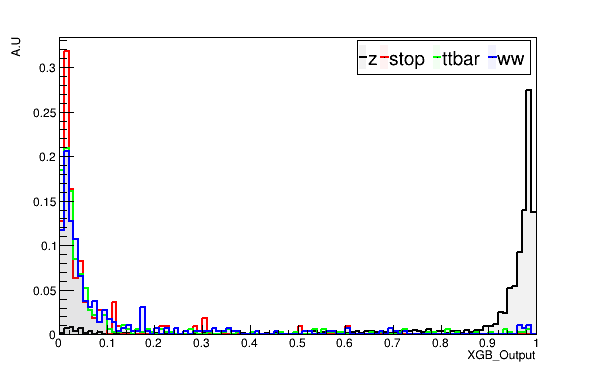

In [34]:
root_analysis.overlap_histos(kinematic_variable= 'XGB_Output', dict_histos= Histos_to_plot)

In [35]:
from Uniandes_Framework.stats_helper import power_test
import numpy as np

In [36]:
signal_txt = np.loadtxt('Histograms/high_per_bin_ML_model_z.dat')
for i in range(len(signal_txt)):
    if signal_txt[i] == 0: signal_txt[i] = 10e-4

In [37]:
signal_txt

array([0.00192926, 0.00707396, 0.00836013, 0.00321543, 0.00707396,
       0.00192926, 0.00321543, 0.001     , 0.00257235, 0.00064309,
       0.00064309, 0.00128617, 0.001     , 0.00128617, 0.00128617,
       0.00064309, 0.00064309, 0.00064309, 0.00064309, 0.001     ,
       0.00128617, 0.00064309, 0.00064309, 0.001     , 0.00064309,
       0.00064309, 0.00064309, 0.00064309, 0.00064309, 0.001     ,
       0.00128617, 0.00192926, 0.00064309, 0.00064309, 0.00192926,
       0.00064309, 0.00064309, 0.001     , 0.00128617, 0.001     ,
       0.001     , 0.001     , 0.00064309, 0.00128617, 0.00064309,
       0.00257235, 0.00064309, 0.00064309, 0.001     , 0.00128617,
       0.00064309, 0.00064309, 0.001     , 0.00385852, 0.00128617,
       0.00257235, 0.00321543, 0.00257235, 0.00192926, 0.00192926,
       0.00128617, 0.00257235, 0.00321543, 0.00192926, 0.00321543,
       0.00385852, 0.00257235, 0.001     , 0.00257235, 0.00128617,
       0.00128617, 0.00321543, 0.00385852, 0.00321543, 0.00450

In [38]:
bkg_txt = np.loadtxt('Histograms/high_per_bin_ML_model_ttbar.dat') + np.loadtxt('Histograms/high_per_bin_ML_model_ww.dat') + np.loadtxt('Histograms/high_per_bin_ML_model_stop.dat')
for i in range(len(bkg_txt)):
    if bkg_txt[i] == 0: bkg_txt[i] = 10e-4

In [39]:
bkg_txt

array([0.42889382, 0.7336065 , 0.45111021, 0.2544047 , 0.21504506,
       0.12579476, 0.08537447, 0.07772164, 0.05460539, 0.07650327,
       0.02261691, 0.05282673, 0.01524473, 0.01774242, 0.01574406,
       0.00343643, 0.00887121, 0.03364523, 0.00887121, 0.00271739,
       0.00687285, 0.01452569, 0.01868115, 0.00271739, 0.00687285,
       0.001     , 0.00343643, 0.00543478, 0.01524473, 0.00343643,
       0.02161824, 0.00615382, 0.00687285, 0.00343643, 0.00615382,
       0.01230764, 0.00343643, 0.00615382, 0.001     , 0.001     ,
       0.00271739, 0.00343643, 0.001     , 0.001     , 0.001     ,
       0.00343643, 0.00271739, 0.001     , 0.001     , 0.00271739,
       0.00909091, 0.00343643, 0.00343643, 0.00543478, 0.001     ,
       0.00543478, 0.00615382, 0.00615382, 0.00271739, 0.00271739,
       0.01596376, 0.001     , 0.001     , 0.001     , 0.001     ,
       0.00271739, 0.001     , 0.00615382, 0.001     , 0.00687285,
       0.00343643, 0.00271739, 0.00887121, 0.001     , 0.001  

In [40]:
power_test.approx_global_sig(sig = signal_txt, bkg = bkg_txt)

0.8298812054754692